In [1]:
import base64
import requests
import json
from config import sportskey
from config import password
from config import gkey
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import os
from ohmysportsfeedspy import MySportsFeeds
import gmaps

msf = MySportsFeeds(version="2.0")
msf.authenticate(sportskey, "MYSPORTSFEEDS")


In [2]:
# retrieves data from API
output = msf.msf_get_data(league='nhl',season='2018-2019-regular',feed='seasonal_player_stats',format='json')
output


{'lastUpdatedOn': '2020-04-18T14:23:27.766Z',
 'playerStatsTotals': [{'player': {'id': 4419,
    'firstName': 'Justin',
    'lastName': 'Abdelkader',
    'primaryPosition': 'LW',
    'jerseyNumber': 8,
    'currentTeam': {'id': 16, 'abbreviation': 'DET'},
    'currentRosterStatus': 'ROSTER',
    'currentInjury': {'description': 'illness',
     'playingProbability': 'QUESTIONABLE'},
    'height': '6\'2"',
    'weight': 213,
    'birthDate': '1987-02-25',
    'age': 33,
    'birthCity': 'Muskegon, MI',
    'birthCountry': 'USA',
    'rookie': False,
    'highSchool': None,
    'college': None,
    'handedness': {'shoots': 'L'},
    'officialImageSrc': 'https://nhl.bamcontent.com/images/headshots/current/168x168/8471716.jpg',
    'socialMediaAccounts': [{'mediaType': 'TWITTER', 'value': 'justinabss'}]},
   'team': {'id': 16, 'abbreviation': 'DET'},
   'stats': {'gamesPlayed': 71,
    'scoring': {'goals': 6,
     'assists': 13,
     'primaryAssists': 3,
     'powerplayPrimaryAssists': 1,
 

In [ ]:
# records amount of records/players
num_records = len(output["playerStatsTotals"])


In [29]:
# creates empty df for all players that aren't goalies
offense_df = pd.DataFrame(columns=['Name', 'Age', 'Position', 'Points'], index = np.arange(num_records))
offense_df



Name  Age Position Points
0     NaN  NaN      NaN    NaN
1     NaN  NaN      NaN    NaN
2     NaN  NaN      NaN    NaN
3     NaN  NaN      NaN    NaN
4     NaN  NaN      NaN    NaN
...   ...  ...      ...    ...
1555  NaN  NaN      NaN    NaN
1556  NaN  NaN      NaN    NaN
1557  NaN  NaN      NaN    NaN
1558  NaN  NaN      NaN    NaN
1559  NaN  NaN      NaN    NaN

[1560 rows x 4 columns]

In [30]:
# loops through every row of empty dataframe and adds the position of each player
for x in range(num_records):
    offense_df.loc[x, 'Position'] = output["playerStatsTotals"][x]["player"]["primaryPosition"]

# removes any player that is a goalie
offense_df = offense_df.loc[offense_df["Position"] != "G"]
offense_df


Name  Age Position Points
0     NaN  NaN       LW    NaN
1     NaN  NaN       LW    NaN
2     NaN  NaN       LW    NaN
3     NaN  NaN       RW    NaN
4     NaN  NaN        C    NaN
...   ...  ...      ...    ...
1554  NaN  NaN        D    NaN
1555  NaN  NaN       RW    NaN
1556  NaN  NaN       LW    NaN
1558  NaN  NaN        D    NaN
1559  NaN  NaN       LW    NaN

[1405 rows x 4 columns]

In [31]:
# loops through df and adds name, age, and points for each player into the df
for index, row in offense_df.iterrows():
    try:
        offense_df.loc[index, 'Name'] = output["playerStatsTotals"][index]["player"]["firstName"] + " " + output["playerStatsTotals"][index]["player"]["lastName"]
        offense_df.loc[index, 'Age'] = output["playerStatsTotals"][index]["player"]["age"]
        offense_df.loc[index, 'Points'] = output["playerStatsTotals"][index]["stats"]["scoring"]["points"]
    except KeyError:
        print("can't find stat for player" + str(index))

offense_df


/opt/anaconda3/envs/PythonData2020_1/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/PythonData2020_1/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/PythonData2020_1/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

Name Age Position Points
0        Justin Abdelkader  33       LW     19
1             Pontus Aberg  26       LW     19
2             Pontus Aberg  26       LW      6
3           Vitaly Abramov  21       RW      0
4             Noel Acciari  28        C     14
...                    ...  ..      ...    ...
1554     Alexander Yelesin  24        D      0
1555          Jesse Ylonen  20       RW      0
1556       Danil Yurtaykin  22       LW      0
1558           Cooper Zech  21        D      0
1559  Harrison Zolnierczyk  32       LW      0

[1405 rows x 4 columns]

In [32]:
# saves df to csv
output_data_file = "Output csv's/2019 nhl offense.csv"
offense_df.to_csv(output_data_file)


In [33]:
# saves csv to df so I don't have to run above cells every time
file_path = os.path.join("Output csv's", "2019 nhl offense.csv")
offense_df = pd.read_csv(file_path)


In [34]:
# creates empty df for all players that are goalies
goalie_df = pd.DataFrame(columns=['Name', 'Age', 'Position', 'Games Played', 'Goals Against Average', 'Save Percentage (x10)', 'Ability Score'], index = np.arange(num_records))
goalie_df


Name  Age Position Games Played Goals Against Average  \
0     NaN  NaN      NaN          NaN                   NaN   
1     NaN  NaN      NaN          NaN                   NaN   
2     NaN  NaN      NaN          NaN                   NaN   
3     NaN  NaN      NaN          NaN                   NaN   
4     NaN  NaN      NaN          NaN                   NaN   
...   ...  ...      ...          ...                   ...   
1555  NaN  NaN      NaN          NaN                   NaN   
1556  NaN  NaN      NaN          NaN                   NaN   
1557  NaN  NaN      NaN          NaN                   NaN   
1558  NaN  NaN      NaN          NaN                   NaN   
1559  NaN  NaN      NaN          NaN                   NaN   

     Save Percentage (x10) Ability Score  
0                      NaN           NaN  
1                      NaN           NaN  
2                      NaN           NaN  
3                      NaN           NaN  
4                      NaN           NaN  
...                    ...           ...  
1555                   NaN           NaN  
1556                   NaN           NaN  
1557                   NaN           NaN  
1558                   NaN           NaN  
1559                   NaN           NaN  

[1560 rows x 7 columns]

In [35]:
# loops through every row of empty dataframe and adds the position of each player
for x in range(num_records):
    goalie_df.loc[x, 'Position'] = output["playerStatsTotals"][x]["player"]["primaryPosition"]

# removes any player that isn't a goalie
goalie_df = goalie_df.loc[goalie_df["Position"] == "G"]
goalie_df


Name  Age Position Games Played Goals Against Average  \
9     NaN  NaN        G          NaN                   NaN   
13    NaN  NaN        G          NaN                   NaN   
14    NaN  NaN        G          NaN                   NaN   
32    NaN  NaN        G          NaN                   NaN   
63    NaN  NaN        G          NaN                   NaN   
...   ...  ...      ...          ...                   ...   
1537  NaN  NaN        G          NaN                   NaN   
1539  NaN  NaN        G          NaN                   NaN   
1544  NaN  NaN        G          NaN                   NaN   
1548  NaN  NaN        G          NaN                   NaN   
1557  NaN  NaN        G          NaN                   NaN   

     Save Percentage (x10) Ability Score  
9                      NaN           NaN  
13                     NaN           NaN  
14                     NaN           NaN  
32                     NaN           NaN  
63                     NaN           NaN  
...                    ...           ...  
1537                   NaN           NaN  
1539                   NaN           NaN  
1544                   NaN           NaN  
1548                   NaN           NaN  
1557                   NaN           NaN  

[155 rows x 7 columns]

In [36]:
# loops through df and adds name, age, games played, goals against avg, and save percentage*10 for each player into the df
# we multiplied save % by 10 so that it's weight is more comparable to goals against average
for index, row in goalie_df.iterrows():
    try:
        goalie_df.loc[index, 'Name'] = output["playerStatsTotals"][index]["player"]["firstName"] + " " + output["playerStatsTotals"][index]["player"]["lastName"]
        goalie_df.loc[index, 'Age'] = output["playerStatsTotals"][index]["player"]["age"]
        goalie_df.loc[index, 'Games Played'] = output["playerStatsTotals"][index]["stats"]["gamesPlayed"]
        goalie_df.loc[index, 'Goals Against Average'] = output["playerStatsTotals"][index]["stats"]["goaltending"]["goalsAgainstAverage"]
        goalie_df.loc[index, 'Save Percentage (x10)'] = (output["playerStatsTotals"][index]["stats"]["goaltending"]["savePercentage"]) * 10
    except KeyError:
        print("can't find stat for player" + str(index))
            
goalie_df


/opt/anaconda3/envs/PythonData2020_1/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/envs/PythonData2020_1/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/envs/PythonData2020_1/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

Name Age Position Games Played Goals Against Average  \
9            Jake Allen  29        G           46                 3.406   
13    Frederik Andersen  30        G           60                 3.321   
14       Craig Anderson  38        G           50                   7.2   
32      Richard Bachman  32        G            1                     6   
63     Jonathan Bernier  31        G           35                 3.121   
...                 ...  ..      ...          ...                   ...   
1537    Scott Wedgewood  27        G            0                     0   
1539        Adam Werner  22        G            0                     0   
1544        Adam Wilcox  27        G            0                     0   
1548        Joseph Woll  21        G            0                     0   
1557       Jeff Zatkoff  32        G            0                     0   

     Save Percentage (x10) Ability Score  
9                     9.06           NaN  
13                    9.17           NaN  
14                    9.03           NaN  
32                    7.93           NaN  
63                    9.08           NaN  
...                    ...           ...  
1537                     0           NaN  
1539                     0           NaN  
1544                     0           NaN  
1548                     0           NaN  
1557                     0           NaN  

[155 rows x 7 columns]

In [37]:
# generates ability score, which is = goals against average + save percentage*10
# removes any goalie with an ability score of 0, because they haven't played
goalie_df["Ability Score"] = goalie_df["Goals Against Average"] + goalie_df["Save Percentage (x10)"]
goalie_df = goalie_df.loc[goalie_df["Ability Score"] > 0]
goalie_df


/opt/anaconda3/envs/PythonData2020_1/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Name Age Position Games Played Goals Against Average  \
9             Jake Allen  29        G           46                 3.406   
13     Frederik Andersen  30        G           60                 3.321   
14        Craig Anderson  38        G           50                   7.2   
32       Richard Bachman  32        G            1                     6   
63      Jonathan Bernier  31        G           35                 3.121   
...                  ...  ..      ...          ...                   ...   
997           Cam Talbot  32        G            4                 3.714   
1030       Linus Ullmark  26        G           37                 4.341   
1036     Semyon Varlamov  31        G           49                  4.34   
1038  Andrei Vasilevskiy  25        G           53                 3.036   
1054            Cam Ward  36        G           33                 4.382   

     Save Percentage (x10) Ability Score  
9                     9.06        12.466  
13                    9.17        12.491  
14                    9.03         16.23  
32                    7.93         13.93  
63                    9.08        12.201  
...                    ...           ...  
997                   8.81        12.524  
1030                  9.14        13.481  
1036                  9.09         13.43  
1038                  9.25        12.286  
1054                  8.99        13.372  

[100 rows x 7 columns]

In [38]:
# removes any goalies that played less than 30 games to make our data more accurate, since they're dealing with percentages
goalie_df = goalie_df.loc[goalie_df["Games Played"] > 29]
goalie_df


Name Age Position Games Played Goals Against Average  \
9             Jake Allen  29        G           46                 3.406   
13     Frederik Andersen  30        G           60                 3.321   
14        Craig Anderson  38        G           50                   7.2   
63      Jonathan Bernier  31        G           35                 3.121   
66     Jordan Binnington  26        G           32                 2.337   
67            Ben Bishop  33        G           46                 2.567   
82      Sergei Bobrovsky  31        G           62                 3.156   
138        Jack Campbell  28        G           31                 2.832   
199       Corey Crawford  35        G           39                 3.191   
236        Casey DeSmith  28        G           36                   4.2   
258         Devan Dubnyk  33        G           67                 3.076   
309    Marc-Andre Fleury  35        G           61                 2.709   
346   Alexandar Georgiev  24        G           33                 3.527   
352          John Gibson  26        G           58                 3.428   
384        Thomas Greiss  34        G           43                 2.908   
386     Philipp Grubauer  28        G           37                 3.121   
405       Jaroslav Halak  34        G           40                  3.09   
418          Carter Hart  21        G           31                  3.99   
432    Connor Hellebuyck  26        G           63                 3.537   
450        Braden Holtby  30        G           59                  3.26   
456         Jimmy Howard  36        G           55                 3.266   
469        Carter Hutton  34        G           50                 3.461   
499         Martin Jones  30        G           62                  3.83   
529       Anton Khudobin  33        G           41                  2.99   
531        Keith Kinkaid  30        G           41                 4.106   
544       Mikko Koskinen  31        G           55                  3.15   
554        Darcy Kuemper  29        G           55                 2.773   
588         Robin Lehner  28        G           46                 2.922   
622     Henrik Lundqvist  38        G           52                 4.002   
623       Roberto Luongo  41        G           43                 3.954   
648      Jacob Markstrom  30        G           60                 3.475   
669    Curtis McElhinney  36        G           33                 3.246   
707          Petr Mrazek  28        G           40                  2.86   
712          Matt Murray  25        G           50                 3.228   
819          Carey Price  32        G           66                  3.26   
829       Jonathan Quick  34        G           46                 4.676   
838          Tuukka Rask  33        G           46                 3.217   
847         James Reimer  32        G           36                 4.025   
856          Pekka Rinne  37        G           56                 2.876   
860        David Rittich  27        G           45                 3.311   
887          Juuse Saros  24        G           31                 3.269   
944           Mike Smith  38        G           42                 3.162   
996           Cam Talbot  32        G           31                 4.742   
1030       Linus Ullmark  26        G           37                 4.341   
1036     Semyon Varlamov  31        G           49                  4.34   
1038  Andrei Vasilevskiy  25        G           53                 3.036   
1054            Cam Ward  36        G           33                 4.382   

     Save Percentage (x10) Ability Score  
9                     9.06        12.466  
13                    9.17        12.491  
14                    9.03         16.23  
63                    9.08        12.201  
66                    9.28        11.617  
67                    9.44        12.007  
82                    9.13        12.286  
138                   9.37 

In [39]:
# resets the df index
goalie_df = goalie_df.reset_index(drop=True)
goalie_df


Name Age Position Games Played Goals Against Average  \
0           Jake Allen  29        G           46                 3.406   
1    Frederik Andersen  30        G           60                 3.321   
2       Craig Anderson  38        G           50                   7.2   
3     Jonathan Bernier  31        G           35                 3.121   
4    Jordan Binnington  26        G           32                 2.337   
5           Ben Bishop  33        G           46                 2.567   
6     Sergei Bobrovsky  31        G           62                 3.156   
7        Jack Campbell  28        G           31                 2.832   
8       Corey Crawford  35        G           39                 3.191   
9        Casey DeSmith  28        G           36                   4.2   
10        Devan Dubnyk  33        G           67                 3.076   
11   Marc-Andre Fleury  35        G           61                 2.709   
12  Alexandar Georgiev  24        G           33                 3.527   
13         John Gibson  26        G           58                 3.428   
14       Thomas Greiss  34        G           43                 2.908   
15    Philipp Grubauer  28        G           37                 3.121   
16      Jaroslav Halak  34        G           40                  3.09   
17         Carter Hart  21        G           31                  3.99   
18   Connor Hellebuyck  26        G           63                 3.537   
19       Braden Holtby  30        G           59                  3.26   
20        Jimmy Howard  36        G           55                 3.266   
21       Carter Hutton  34        G           50                 3.461   
22        Martin Jones  30        G           62                  3.83   
23      Anton Khudobin  33        G           41                  2.99   
24       Keith Kinkaid  30        G           41                 4.106   
25      Mikko Koskinen  31        G           55                  3.15   
26       Darcy Kuemper  29        G           55                 2.773   
27        Robin Lehner  28        G           46                 2.922   
28    Henrik Lundqvist  38        G           52                 4.002   
29      Roberto Luongo  41        G           43                 3.954   
30     Jacob Markstrom  30        G           60                 3.475   
31   Curtis McElhinney  36        G           33                 3.246   
32         Petr Mrazek  28        G           40                  2.86   
33         Matt Murray  25        G           50                 3.228   
34         Carey Price  32        G           66                  3.26   
35      Jonathan Quick  34        G           46                 4.676   
36         Tuukka Rask  33        G           46                 3.217   
37        James Reimer  32        G           36                 4.025   
38         Pekka Rinne  37        G           56                 2.876   
39       David Rittich  27        G           45                 3.311   
40         Juuse Saros  24        G           31                 3.269   
41          Mike Smith  38        G           42                 3.162   
42          Cam Talbot  32        G           31                 4.742   
43       Linus Ullmark  26        G           37                 4.341   
44     Semyon Varlamov  31        G           49                  4.34   
45  Andrei Vasilevskiy  25        G           53                 3.036   
46            Cam Ward  36        G           33                 4.382   

   Save Percentage (x10) Ability Score  
0                   9.06        12.466  
1                   9.17        12.491  
2                   9.03         16.23  
3                   9.08        12.201  
4                   9.28        11.617  
5                   9.44        12.007  
6                   9.13        12.286  
7                   9.37        12.202  
8                    9.1        12.291  
9                   9.17         13.37  
10            

In [40]:
# saves df to csv
output_data_file2 = "Output csv's/2019 nhl goalies.csv"
goalie_df.to_csv(output_data_file2)


In [3]:
# saves csv to df so I don't have to run above cells every time
file_path2 = os.path.join("Output csv's", "2019 nhl goalies.csv")
goalie_df = pd.read_csv(file_path2)


In [4]:
# function to create Linear Regression plots
def regression(x_values, y_values, x_line_placement, y_line_placement, y_label, title, file_name):
    # Adds the linear regression equation and line to plot
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    #stores regression line
    regress_values = x_values * slope + intercept
    # creates the formula of the line that will appear
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # plots points
    plt.scatter(x_values,y_values)
    # plots regression line, ”r-“ makes the line a continuous
    plt.plot(x_values,regress_values,"r-")
    # makes the formula appear
    plt.annotate(line_eq,(x_line_placement, y_line_placement),fontsize=15,color="red")
    plt.xlabel("Age")
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared value is: {rvalue**2}")
    plt.savefig("Figures/" + file_name + ".png")
    plt.show()


The r-squared value is: 0.01383083348759395


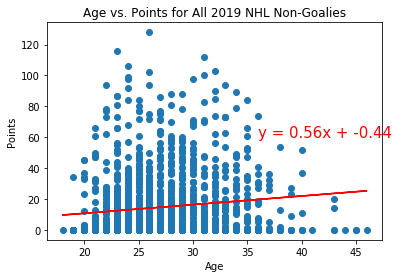

In [50]:
# calls the regression equation and passes in unique values for arguments
# creates scatter plot of age vs. points for all 2019 nhl non-goalies
regression(offense_df["Age"], offense_df["Points"], 36, 60, "Points", "Age vs. Points for All 2019 NHL Non-Goalies", "ability score all 2019 nhl non-goalies")


In [51]:
# sorts df by points- greatest to least- and takes only the top 100 players
offense_sorted = offense_df.sort_values("Points", ascending=False)
top_offense = offense_sorted.iloc[0:100, :]
top_offense


Unnamed: 0                Name  Age Position  Points
499         553     Nikita Kucherov   26       RW     128
605         667      Connor McDavid   23        C     116
462         512        Patrick Kane   31       RW     112
227         253      Leon Draisaitl   24        C     106
182         200       Sidney Crosby   32        C     103
..          ...                 ...  ...      ...     ...
653         724        Brock Nelson   28        C      53
108         120        Dustin Brown   35       RW      53
937        1034  James van Riemsdyk   30       LW      52
919        1015        Joe Thornton   40        C      52
931        1027           Alex Tuch   23       RW      52

[100 rows x 5 columns]

The r-squared value is: 0.0173503880428731


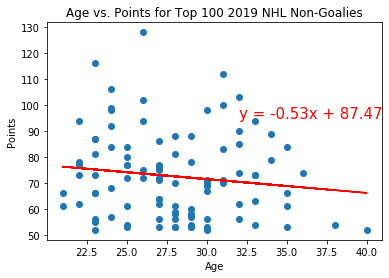

In [52]:
# calls the regression equation and passes in unique values for arguments
# creates scatter plot of age vs. points for top 100 2019 nhl non-goalies
regression(top_offense["Age"], top_offense["Points"], 32, 95, "Points", "Age vs. Points for Top 100 2019 NHL Non-Goalies", "ability score top 2019 nhl non-goalies")


The r-squared value is: 0.025813952987953304


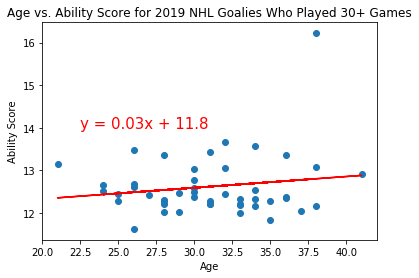

In [53]:
# calls the regression equation and passes in unique values for arguments
# creates scatter plot of age vs. ability for 2019 nhl goalies who played 30+ games
regression(goalie_df["Age"], goalie_df["Ability Score"], 22.5, 14, "Ability Score", "Age vs. Ability Score for 2019 NHL Goalies Who Played 30+ Games", "ability score 2019 nhl goalies")


The r-squared value is: 0.041876060908195234


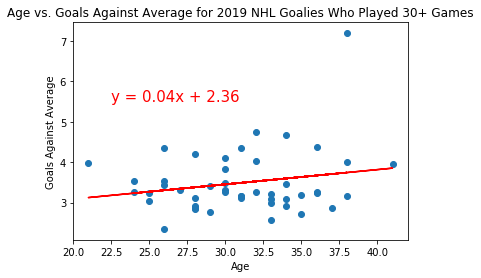

In [46]:
# calls the regression equation and passes in unique values for arguments
# creates scatter plot of age vs. goals against average for 2019 nhl goalies who played 30+ games
regression(goalie_df["Age"], goalie_df["Goals Against Average"], 22.5, 5.5, "Goals Against Average", "Age vs. Goals Against Average for 2019 NHL Goalies Who Played 30+ Games", "goals against avg 2019 nhl goalies")


The r-squared value is: 0.1487904763411525


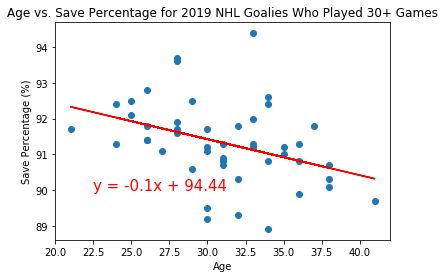

In [8]:
# calls the regression equation and passes in unique values for arguments
# creates scatter plot of age vs. goals against average for 2019 nhl goalies who played 30+ games
regression(goalie_df["Age"], (goalie_df["Save Percentage (x10)"] * 10), 22.5, 90, "Save Percentage (%)", "Age vs. Save Percentage for 2019 NHL Goalies Who Played 30+ Games", "save per 2019 nhl goalies")


In [8]:
# creates empty df for all players that aren't goalies
all_df = pd.DataFrame(columns=['Name', 'Age', 'Birth City', 'Birth Country', 'Birth Lat', 'Birth Lng', 'College', 'College Lat', 'College Lng'], index = np.arange(num_records))
all_df


Name  Age Birth City Birth Country Birth Lat Birth Lng College  \
0     NaN  NaN        NaN           NaN       NaN       NaN     NaN   
1     NaN  NaN        NaN           NaN       NaN       NaN     NaN   
2     NaN  NaN        NaN           NaN       NaN       NaN     NaN   
3     NaN  NaN        NaN           NaN       NaN       NaN     NaN   
4     NaN  NaN        NaN           NaN       NaN       NaN     NaN   
...   ...  ...        ...           ...       ...       ...     ...   
1555  NaN  NaN        NaN           NaN       NaN       NaN     NaN   
1556  NaN  NaN        NaN           NaN       NaN       NaN     NaN   
1557  NaN  NaN        NaN           NaN       NaN       NaN     NaN   
1558  NaN  NaN        NaN           NaN       NaN       NaN     NaN   
1559  NaN  NaN        NaN           NaN       NaN       NaN     NaN   

     College Lat College Lng  
0            NaN         NaN  
1            NaN         NaN  
2            NaN         NaN  
3            NaN         NaN  
4            NaN         NaN  
...          ...         ...  
1555         NaN         NaN  
1556         NaN         NaN  
1557         NaN         NaN  
1558         NaN         NaN  
1559         NaN         NaN  

[1560 rows x 9 columns]

In [16]:
# loops through df and adds name, birth city, birth country, and college for each player into df
for index, row in all_df.iterrows():
    try:
        all_df.loc[index, 'Name'] = output["playerStatsTotals"][index]["player"]["firstName"] + " " + output["playerStatsTotals"][index]["player"]["lastName"]
        all_df.loc[index, 'Age'] = output["playerStatsTotals"][index]["player"]["age"]
        all_df.loc[index, 'Birth City'] = output["playerStatsTotals"][index]["player"]["birthCity"]
        all_df.loc[index, 'Birth Country'] = output["playerStatsTotals"][index]["player"]["birthCountry"]
        all_df.loc[index, 'College'] = output["playerStatsTotals"][index]["player"]["college"]
    except KeyError:
        print("can't find data for player" + str(index))
            
all_df


Unnamed: 0  Unnamed: 0.1                  Name      Birth City  \
0              0             0     Justin Abdelkader    Muskegon, MI   
1              1             1          Pontus Aberg       Stockholm   
2              2             2          Pontus Aberg       Stockholm   
3              3             3        Vitaly Abramov     Chelyabinsk   
4              4             4          Noel Acciari    Johnston, RI   
...          ...           ...                   ...             ...   
1555        1555          1555          Jesse Ylonen           Espoo   
1556        1556          1556       Danil Yurtaykin          Belovo   
1557        1557          1557          Jeff Zatkoff     Detroit, MI   
1558        1558          1558           Cooper Zech  South Lyon, MI   
1559        1559          1559  Harrison Zolnierczyk     Toronto, ON   

     Birth Country  Birth Lat  Birth Lng  College  College Lat  College Lng  \
0              USA        NaN        NaN      NaN          NaN          NaN   
1           Sweden        NaN        NaN      NaN          NaN          NaN   
2           Sweden        NaN        NaN      NaN          NaN          NaN   
3           Russia        NaN        NaN      NaN          NaN          NaN   
4              USA        NaN        NaN      NaN          NaN          NaN   
...            ...        ...        ...      ...          ...          ...   
1555           USA        NaN        NaN      NaN          NaN          NaN   
1556        Russia        NaN        NaN      NaN          NaN          NaN   
1557           USA        NaN        NaN      NaN          NaN          NaN   
1558           USA        NaN        NaN      NaN          NaN          NaN   
1559        Canada        NaN        NaN      NaN          NaN          NaN   

       Age  
0     33.0  
1     26.0  
2     26.0  
3     21.0  
4     28.0  
...    ...  
1555  20.0  
1556  22.0  
1557  32.0  
1558  21.0  
1559  32.0  

[1560 rows x 11 columns]

In [17]:
# saves df to csv
output_data_file3 = "Output csv's/2019 all nhl.csv"
all_df.to_csv(output_data_file3)


In [18]:
# saves csv to df so I don't have to run above cells every time
file_path3 = os.path.join("Output csv's", "2019 all nhl.csv")
all_df = pd.read_csv(file_path3)


In [19]:
# groups by age
age_count = all_df["Age"].value_counts()
age_count
# turns series into df
age_count = age_count.to_frame()
# resets index so age is a column
age_count = age_count.reset_index()
# renames columns
age_count = age_count.rename(columns={"index":"Age", "Age":"Number of Players of that Age"})
age_count
# sorts by age
age_count = age_count.sort_values("Age")
age_count


Age  Number of Players of that Age
25  18.0                              1
19  19.0                              9
13  20.0                             44
9   21.0                             73
7   22.0                            105
4   23.0                            134
2   24.0                            143
3   25.0                            140
1   26.0                            143
0   27.0                            147
5   28.0                            114
6   29.0                            110
8   30.0                             82
10  31.0                             62
11  32.0                             56
12  33.0                             53
15  34.0                             32
14  35.0                             37
16  36.0                             25
17  37.0                             14
18  38.0                             12
20  39.0                              8
21  40.0                              6
23  41.0                              2
22  43.0                              4
27  44.0                              1
24  45.0                              2
26  46.0                              1

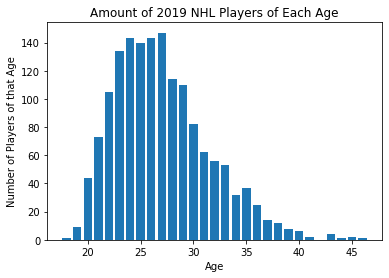

In [22]:
# plots and saves bar graph of how many players there are of each age
plt.bar(age_count["Age"], age_count["Number of Players of that Age"])
plt.xlabel('Age')
plt.ylabel('Number of Players of that Age')
plt.title("Amount of 2019 NHL Players of Each Age")
plt.savefig("Figures/num ages 2019 nhl.png")


In [4]:
# removes any rows where birth cities or countries were NaN
birth_df = all_df[all_df['Birth City'].notna()]
birth_df = birth_df[birth_df['Birth Country'].notna()]
birth_df


Unnamed: 0                  Name      Birth City Birth Country  \
0              0     Justin Abdelkader    Muskegon, MI           USA   
1              1          Pontus Aberg       Stockholm        Sweden   
2              2          Pontus Aberg       Stockholm        Sweden   
3              3        Vitaly Abramov     Chelyabinsk        Russia   
4              4          Noel Acciari    Johnston, RI           USA   
...          ...                   ...             ...           ...   
1555        1555          Jesse Ylonen           Espoo           USA   
1556        1556       Danil Yurtaykin          Belovo        Russia   
1557        1557          Jeff Zatkoff     Detroit, MI           USA   
1558        1558           Cooper Zech  South Lyon, MI           USA   
1559        1559  Harrison Zolnierczyk     Toronto, ON        Canada   

      Birth Lat  Birth Lng  College  College Lat  College Lng  
0           NaN        NaN      NaN          NaN          NaN  
1           NaN        NaN      NaN          NaN          NaN  
2           NaN        NaN      NaN          NaN          NaN  
3           NaN        NaN      NaN          NaN          NaN  
4           NaN        NaN      NaN          NaN          NaN  
...         ...        ...      ...          ...          ...  
1555        NaN        NaN      NaN          NaN          NaN  
1556        NaN        NaN      NaN          NaN          NaN  
1557        NaN        NaN      NaN          NaN          NaN  
1558        NaN        NaN      NaN          NaN          NaN  
1559        NaN        NaN      NaN          NaN          NaN  

[1556 rows x 9 columns]

In [5]:
# itterate through every index and row of df
for index, row in birth_df.iterrows():
# sets target place to the name of each player's birth location
    target_place = "{0},{1}".format(row['Birth City'], row['Birth Country'])
# sets parameters for url
    params = {
        "address": target_place,
        "key": gkey
    }
# if geocode can find the coordinates for the location, proceed, if not, output a print statement
    try:
        base_url = "https://maps.googleapis.com/maps/api/geocode/json"
# extracts contents of API
        response = requests.get(base_url, params = params).json()
# sets variable to the path to take within the API dictionary
        results = response['results'][0]["geometry"]["location"]
# adds the lat and lng of each location to the df
        birth_df.loc[index, 'Birth Lat'] = results["lat"]
        birth_df.loc[index, 'Birth Lng'] = results["lng"]
    except IndexError:
        print("Can't find coordinates of town... skipping")


In [6]:
birth_df


Unnamed: 0                  Name      Birth City Birth Country  \
0              0     Justin Abdelkader    Muskegon, MI           USA   
1              1          Pontus Aberg       Stockholm        Sweden   
2              2          Pontus Aberg       Stockholm        Sweden   
3              3        Vitaly Abramov     Chelyabinsk        Russia   
4              4          Noel Acciari    Johnston, RI           USA   
...          ...                   ...             ...           ...   
1555        1555          Jesse Ylonen           Espoo           USA   
1556        1556       Danil Yurtaykin          Belovo        Russia   
1557        1557          Jeff Zatkoff     Detroit, MI           USA   
1558        1558           Cooper Zech  South Lyon, MI           USA   
1559        1559  Harrison Zolnierczyk     Toronto, ON        Canada   

      Birth Lat  Birth Lng  College  College Lat  College Lng  
0     43.234181 -86.248392      NaN          NaN          NaN  
1     59.329323  18.068581      NaN          NaN          NaN  
2     59.329323  18.068581      NaN          NaN          NaN  
3     55.164442  61.436843      NaN          NaN          NaN  
4     41.820520 -71.512617      NaN          NaN          NaN  
...         ...        ...      ...          ...          ...  
1555  60.205491  24.655900      NaN          NaN          NaN  
1556  54.422111  86.303480      NaN          NaN          NaN  
1557  42.331427 -83.045754      NaN          NaN          NaN  
1558  42.460590 -83.651606      NaN          NaN          NaN  
1559  43.653226 -79.383184      NaN          NaN          NaN  

[1556 rows x 9 columns]

In [7]:
# Access maps with unique API key
gmaps.configure(api_key=gkey)

# creates heat map of birth locations 
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(birth_df[["Birth Lat", "Birth Lng"]])
fig.add_layer(heatmap_layer)
fig


Figure(layout=FigureLayout(height='420px'))

In [39]:
# removes any rows where college is NaN
college_df = all_df[all_df['College'].notna()]
college_df


Empty DataFrame
Columns: [Unnamed: 0, Name, Birth City, Birth Country, Birth Lat, Birth Lng, College, College Lat, College Lng]
Index: []

In [6]:
# saves csv of nhl colleges to df (seperate from the API)
file_path4 = os.path.join("nhl_college.csv")
college_df = pd.read_csv(file_path4)
college_df["College Lat"] = ""
college_df["College Lng"] = ""
college_df


NAME POSITION         COLLEGE  NHL TEAM College Lat College Lng
0      Kevin Boyle         G    UMass Lowell   Anaheim                        
1    Patrick Eaves         F  Boston College   Anaheim                        
2       Derek Grant        F  Michigan State   Anaheim                        
3      Chad Johnson        D          Alaska   Anaheim                        
4       Ryan Kesler        F      Ohio State   Anaheim                        
..              ...      ...             ...       ...         ...         ...
323   Jack Roslovic        F           Miami  Winnipeg                        
324   Cam Schilling        D           Miami  Winnipeg                        
325   Brandon Tanev        F      Providence  Winnipeg                        
326    Jacob Trouba        D        Michigan  Winnipeg                        
327  Blake Wheeler         F       Minnesota  Winnipeg                        

[328 rows x 6 columns]

In [7]:
# itterate through every index and row of df
for index, row in college_df.iterrows():
# sets target place to the name of each player's birth location
    target_place = "{0}".format(row['COLLEGE'])
# sets parameters for url
    params = {
        "address": target_place,
        "key": gkey
    }
# if geocode can find the coordinates for the college, proceed, if not, output a print statement
    try:
        base_url = "https://maps.googleapis.com/maps/api/geocode/json"
# extracts contents of API
        response = requests.get(base_url, params = params).json()
# sets variable to the path to take within the API dictionary
        results = response['results'][0]["geometry"]["location"]
# adds the lat and lng of each location to the df
        college_df.loc[index, 'College Lat'] = results["lat"]
        college_df.loc[index, 'College Lng'] = results["lng"]
    except IndexError:
        print("Can't find coordinates of college... skipping")


In [8]:
college_df 


NAME POSITION         COLLEGE  NHL TEAM College Lat College Lng
0      Kevin Boyle         G    UMass Lowell   Anaheim     42.6553    -71.3247
1    Patrick Eaves         F  Boston College   Anaheim     42.3355    -71.1685
2       Derek Grant        F  Michigan State   Anaheim     42.7018    -84.4822
3      Chad Johnson        D          Alaska   Anaheim     64.2008    -149.494
4       Ryan Kesler        F      Ohio State   Anaheim     40.0068    -83.0306
..              ...      ...             ...       ...         ...         ...
323   Jack Roslovic        F           Miami  Winnipeg     25.7617    -80.1918
324   Cam Schilling        D           Miami  Winnipeg     25.7617    -80.1918
325   Brandon Tanev        F      Providence  Winnipeg     36.1651    -94.1067
326    Jacob Trouba        D        Michigan  Winnipeg     44.3148    -85.6024
327  Blake Wheeler         F       Minnesota  Winnipeg     46.7296    -94.6859

[328 rows x 6 columns]

In [9]:
# Access maps with unique API key
gmaps.configure(api_key=gkey)

# creates heat map of colleges
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(college_df[["College Lat", "College Lng"]])
fig.add_layer(heatmap_layer)
fig


Figure(layout=FigureLayout(height='420px'))